# Mengimpor Library yang Diperlukan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Kode ini mengimpor beberapa library:
*   pandas untuk manipulasi data.
*   matplotlib.pyplot untuk visualisasi data.
*   train_test_split dan cross_val_score dari sklearn untuk membagi data dan melakukan validasi silang.
*   LinearRegression dari sklearn untuk membuat model regresi linear.
*   mean_absolute_error, mean_squared_error, dan r2_score untuk mengevaluasi model.





# Import File CSV

In [ ]:
# URL GitHub raw untuk file CSV
url = 'https://raw.githubusercontent.com/NourAnisa/Analisis-dan-Prediksi-Tingkat-Penyelesaian-Pendidikan-di-Indonesia/main/Tingkat%20Penyelesaian%20Pendidikan%20Menurut%20Jenjang%20Pendidikan%20dan%20Provinsi.csv'

# Load the CSV file
data = pd.read_csv(url)

Kode ini memuat data dari file CSV ke dalam DataFrame data.

Untuk mendapatkan link raw yaitu :
1.   import terlebih dahulu ke dalam repository dan tekan raw
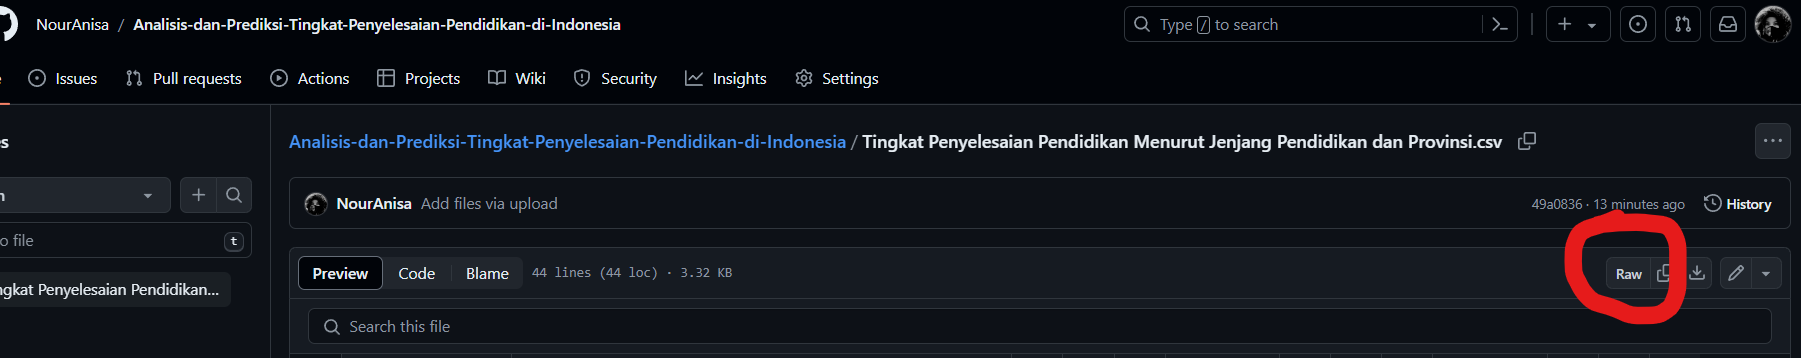

2.   kemudian copy paste link
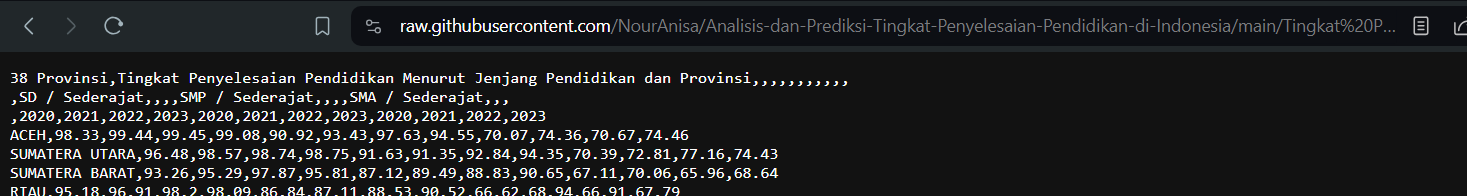

# Preprocessing

**Mengganti Nama Kolom dan Menghapus Baris yang Tidak Diperlukan**

In [ ]:
# Ganti nama kolom untuk kejelasan yang lebih baik dan hapus baris yang tidak perlu
data.columns = ['Provinsi', 'SD_2020', 'SD_2021', 'SD_2022', 'SD_2023', 'SMP_2020', 'SMP_2021', 'SMP_2022', 'SMP_2023', 'SMA_2020', 'SMA_2021', 'SMA_2022', 'SMA_2023']
data = data.drop([0, 1])
data = data.reset_index(drop=True)

*   Mengganti nama kolom agar lebih jelas.
*   Menghapus dua baris pertama yang berisi header tambahan yang tidak diperlukan.
*   Mengatur ulang indeks setelah penghapusan baris.








**Mengonversi Kolom yang Relevan ke Tipe Numerik**

In [ ]:
for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

Mengonversi nilai dalam kolom selain 'Provinsi' menjadi tipe numerik.

**Menampilkan Data yang Telah Dibersihkan**

In [ ]:
print(data.head())

         Provinsi  SD_2020  SD_2021  SD_2022  SD_2023  SMP_2020  SMP_2021  \
0            ACEH    98.33    99.44    99.45    99.08     90.92     93.43   
1  SUMATERA UTARA    96.48    98.57    98.74    98.75     91.63     91.35   
2  SUMATERA BARAT    93.26    95.29    97.87    95.81     87.12     89.49   
3            RIAU    95.18    96.91    98.20    98.09     86.84     87.11   
4           JAMBI    95.34    98.54    97.62    97.76     86.31     89.00   

   SMP_2022  SMP_2023  SMA_2020  SMA_2021  SMA_2022  SMA_2023  
0     97.63     94.55     70.07     74.36     70.67     74.46  
1     92.84     94.35     70.39     72.81     77.16     74.43  
2     88.83     90.65     67.11     70.06     65.96     68.64  
3     88.53     90.52     66.62     68.94     66.91     67.79  
4     86.57     89.35     63.66     64.51     65.85     66.62  


Menampilkan lima baris pertama dari data yang telah dibersihkan.

**Menghilangkan mising values**

In [ ]:
numeric_columns = data.columns[1:]
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Menghitung dan Memvisualisasi

**Menghitung dan Memvisualisasikan Rata-rata Tingkat Penyelesaian Pendidikan per Jenjang**

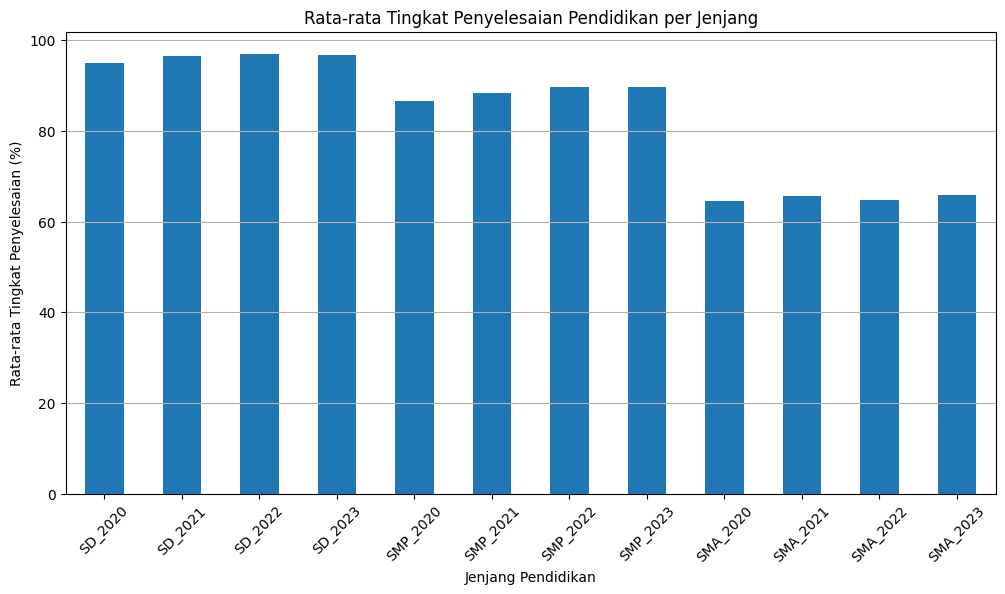

In [ ]:
average_completion_rate = data.mean(numeric_only=True)
plt.figure(figsize=(12, 6))
average_completion_rate.plot(kind='bar')
plt.title('Rata-rata Tingkat Penyelesaian Pendidikan per Jenjang')
plt.xlabel('Jenjang Pendidikan')
plt.ylabel('Rata-rata Tingkat Penyelesaian (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

*   Menghitung rata-rata tingkat penyelesaian pendidikan untuk setiap jenjang (SD, SMP, SMA) dari tahun 2020 hingga 2023.
*   Membuat grafik batang untuk menunjukkan rata-rata tersebut.




**Menghitung dan Memvisualisasikan Perubahan Tahunan Tingkat Penyelesaian Pendidikan**

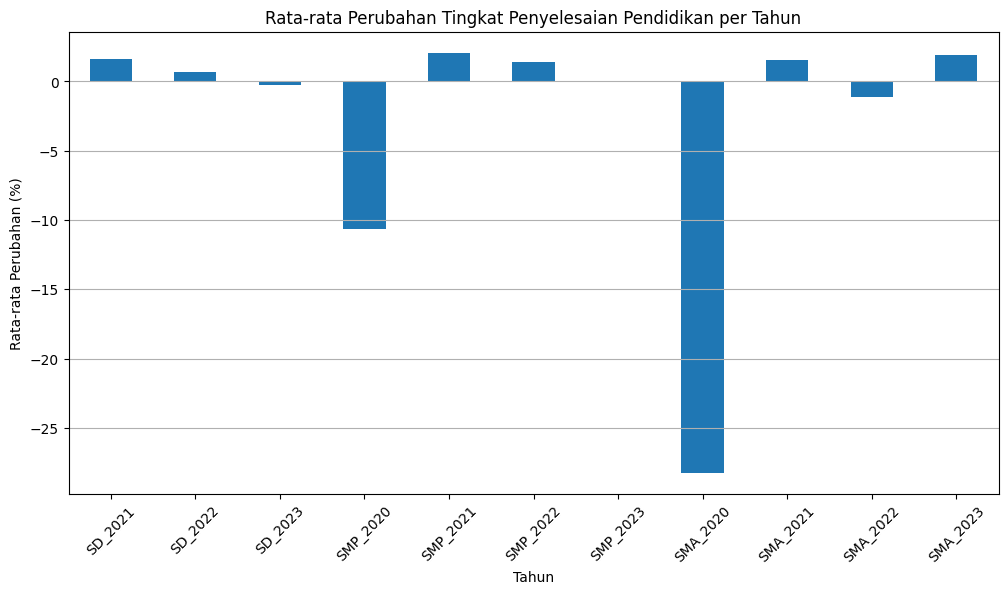

In [ ]:
yearly_change = data.set_index('Provinsi').pct_change(axis='columns') * 100
average_yearly_change = yearly_change.mean().dropna()
plt.figure(figsize=(12, 6))
average_yearly_change.plot(kind='bar')
plt.title('Rata-rata Perubahan Tingkat Penyelesaian Pendidikan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Perubahan (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



*   Menghitung perubahan persentase tahun ke tahun untuk setiap jenjang pendidikan.
*   Membuat grafik batang untuk menunjukkan rata-rata perubahan tersebut.




**Mengidentifikasi Provinsi dengan Tingkat Penyelesaian Tertinggi dan Terendah pada Tahun 2023**

In [ ]:
highest_lowest_completion = {
    'SD_2023': {
        'Highest': data.loc[data['SD_2023'].idxmax(), ['Provinsi', 'SD_2023']],
        'Lowest': data.loc[data['SD_2023'].idxmin(), ['Provinsi', 'SD_2023']]
    },
    'SMP_2023': {
        'Highest': data.loc[data['SMP_2023'].idxmax(), ['Provinsi', 'SMP_2023']],
        'Lowest': data.loc[data['SMP_2023'].idxmin(), ['Provinsi', 'SMP_2023']]
    },
    'SMA_2023': {
        'Highest': data.loc[data['SMA_2023'].idxmax(), ['Provinsi', 'SMA_2023']],
        'Lowest': data.loc[data['SMA_2023'].idxmin(), ['Provinsi', 'SMA_2023']]
    }
}
print(highest_lowest_completion)


{'SD_2023': {'Highest': Provinsi    JAWA BARAT
SD_2023          99.09
Name: 11, dtype: object, 'Lowest': Provinsi    PAPUA
SD_2023     80.09
Name: 34, dtype: object}, 'SMP_2023': {'Highest': Provinsi    DI YOGYAKARTA
SMP_2023            97.02
Name: 13, dtype: object, 'Lowest': Provinsi    PAPUA
SMP_2023    67.12
Name: 34, dtype: object}, 'SMA_2023': {'Highest': Provinsi    DI YOGYAKARTA
SMA_2023            89.69
Name: 13, dtype: object, 'Lowest': Provinsi    PAPUA
SMA_2023     39.5
Name: 34, dtype: object}}


Mengidentifikasi dan mencetak provinsi dengan tingkat penyelesaian tertinggi dan terendah untuk masing-masing jenjang pendidikan pada tahun 2023.

# Pemodelan

**Menyiapkan Data untuk Model Regresi**

In [ ]:
data_model = data.copy().drop(columns=['Provinsi'])
X = data_model.drop(columns=['SD_2023', 'SMP_2023', 'SMA_2023'])
y_sd = data_model['SD_2023']
y_smp = data_model['SMP_2023']
y_sma = data_model['SMA_2023']

*   Menyalin data dan menghapus kolom 'Provinsi'.
*   Membagi data menjadi fitur (X) dan target (y) untuk masing-masing jenjang pendidikan.




**Membagi Data menjadi Set Pelatihan dan Pengujian**

In [ ]:
X_train, X_test, y_train_sd, y_test_sd = train_test_split(X, y_sd, test_size=0.2, random_state=42)
_, _, y_train_smp, y_test_smp = train_test_split(X, y_smp, test_size=0.2, random_state=42)
_, _, y_train_sma, y_test_sma = train_test_split(X, y_sma, test_size=0.2, random_state=42)

Membagi data menjadi set pelatihan dan set pengujian dengan rasio 80:20.

***Melatih Model Regresi Linear untuk Masing-masing Jenjang Pendidikan***

In [ ]:
model_sd = LinearRegression()
model_smp = LinearRegression()
model_sma = LinearRegression()

model_sd.fit(X_train, y_train_sd)
model_smp.fit(X_train, y_train_smp)
model_sma.fit(X_train, y_train_sma)


LinearRegression()

Melatih model regresi linear untuk masing-masing jenjang pendidikan.

**Memprediksi Tingkat Penyelesaian untuk Set Pengujian**

In [ ]:
y_pred_sd = model_sd.predict(X_test)
y_pred_smp = model_smp.predict(X_test)
y_pred_sma = model_sma.predict(X_test)

Memprediksi tingkat penyelesaian pada set pengujian.

Mengevaluasi Model

In [ ]:
print("Evaluasi Model SD")
print("MAE:", mean_absolute_error(y_test_sd, y_pred_sd))
print("MSE:", mean_squared_error(y_test_sd, y_pred_sd))
print("R²:", r2_score(y_test_sd, y_pred_sd))

print("\nEvaluasi Model SMP")
print("MAE:", mean_absolute_error(y_test_smp, y_pred_smp))
print("MSE:", mean_squared_error(y_test_smp, y_pred_smp))
print("R²:", r2_score(y_test_smp, y_pred_smp))

print("\nEvaluasi Model SMA")
print("MAE:", mean_absolute_error(y_test_sma, y_pred_sma))
print("MSE:", mean_squared_error(y_test_sma, y_pred_sma))
print("R²:", r2_score(y_test_sma, y_pred_sma))


Evaluasi Model SD
MAE: 0.5270250207429447
MSE: 0.44913646490975495
R²: 0.6637806722595989

Evaluasi Model SMP
MAE: 1.3429406590212412
MSE: 3.191115278479393
R²: 0.8195050148908509

Evaluasi Model SMA
MAE: 1.1378941992092146
MSE: 2.498745344556709
R²: 0.9753444500225741


Mengevaluasi kinerja model menggunakan MAE (Mean Absolute Error), MSE (Mean Squared Error), dan R².

**Validasi Silang**

In [ ]:
scores_sd = cross_val_score(model_sd, X, y_sd, cv=5, scoring='r2')
scores_smp = cross_val_score(model_smp, X, y_smp, cv=5, scoring='r2')
scores_sma = cross_val_score(model_sma, X, y_sma, cv=5, scoring='r2')

print("\nValidasi Silang Model SD (R²):", scores_sd)
print("Validasi Silang Model SMP (R²):", scores_smp)
print("Validasi Silang Model SMA (R²):", scores_sma)



Validasi Silang Model SD (R²): [ 0.38906333 -0.8965362   0.03818247  0.772733    0.96610272]
Validasi Silang Model SMP (R²): [0.67447554 0.34172736 0.7645221  0.75454396 0.99120893]
Validasi Silang Model SMA (R²): [0.48555595 0.96091808 0.95829181 0.8658095  0.98602963]


Melakukan validasi silang untuk memastikan model tidak overfitting dan mencetak hasil validasi silang untuk masing-masing model.